<table align="left">
  <td>
    <a href="https://is.gd/kvl7JS" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

##  Parte 1: Descripción Flujo de Trabajo. 

El flujo de trabajo para la solución de un proyecto de IA pasa por siete etapas descritas en el libro [Data Science Solutions](https://is.gd/3AmkVv).


* Definición de la pregunta o del problema.
* Adquirir datos de entrenamiento y de prueba.
* Manejar, preparar y limpiar los datos.
* Analizar, identificar patrones y explorar los datos.
* Modelar, predecir y resolver el problema.
* Visualizar, informar y presentar los pasos de la resolución del problema y la solución final.
* Suministrar o presentar los resultados.
* El flujo de trabajo indica la secuencia general de cómo cada etapa puede seguir a la otra. Sin embargo, hay casos de uso con excepciones.

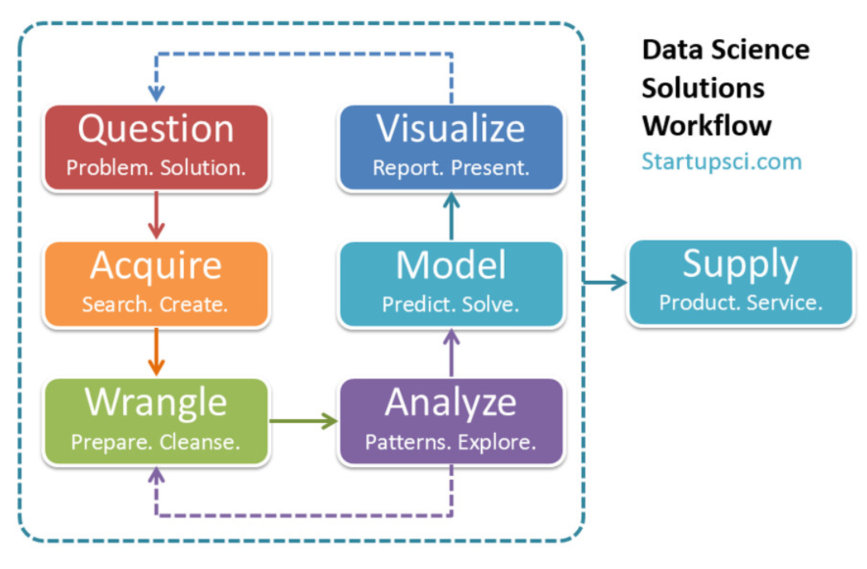




* Es posible combinar múltiples etapas del flujo de trabajo. 
* Se pueden analizar visualizando los datos.
* Realizar una etapa antes de lo indicado. 
* Analizar los datos antes y después de la gestión.
* Realizar una etapa varias veces en nuestro flujo de trabajo. 
* La etapa de visualización puede ser utilizada varias veces.
* Dejar de lado una etapa. 


## Parte 2: Descripción del problema. 

La diabetes es una enfermedad crónica asociada a niveles elevados de azúcar en sangre. La diabetes suele provocar enfermedades cardiovasculares, derrames cerebrales, daños en los riñones y daños a largo plazo en las extremidades (es decir, extremidades y ojos).

Se calcula que hay 415 millones de personas en el mundo que padecen diabetes, y que hasta 5 millones de muertes al año se atribuyen a complicaciones relacionadas con la diabetes. En Estados Unidos, se calcula que la diabetes es la séptima causa de muerte. Está claro que la diabetes es una causa de preocupación para el bienestar de la sociedad moderna.

La diabetes puede dividirse en dos subtipos: tipo 1 y tipo 2. La diabetes de tipo 1 es el resultado de la incapacidad del cuerpo para producir suficiente insulina. La diabetes de tipo 1 es relativamente rara en comparación con la de tipo 2, y sólo representa aproximadamente el 5% de la diabetes. Por desgracia, se desconoce la causa exacta de la diabetes de tipo 1 y, por tanto, es difícil prevenir su aparición. 

La diabetes de tipo 2 es el resultado de la resistencia gradual del organismo a la insulina. La diabetes de tipo 2 es la forma más frecuente de diabetes en el mundo, y está causada por el exceso de peso corporal, el ejercicio irregular y una dieta inadecuada. Afortunadamente, la aparición de la diabetes de tipo 2 puede prevenirse y revertirse si se diagnostica a tiempo.

Uno de los obstáculos para la detección y el diagnóstico precoces de la diabetes es que las primeras fases de la enfermedad no suelen ser sintomáticas. Las personas que están en el camino de la diabetes (también conocida como prediabetes) a menudo no saben que tienen diabetes hasta que es demasiado tarde.

¿Cómo podemos utilizar el **aprendizaje automático** para resolver este problema? Si tenemos un conjunto de datos etiquetados que contenga algunas mediciones vitales de los pacientes (por ejemplo, la edad y el nivel de insulina en sangre), así como una etiqueta verdadera que indique la aparición de la diabetes en el paciente en algún momento posterior a la toma de las mediciones, podemos entrenar una red neuronal (clasificador de aprendizaje automático) con estos datos y utilizarla para hacer predicciones sobre nuevos pacientes:

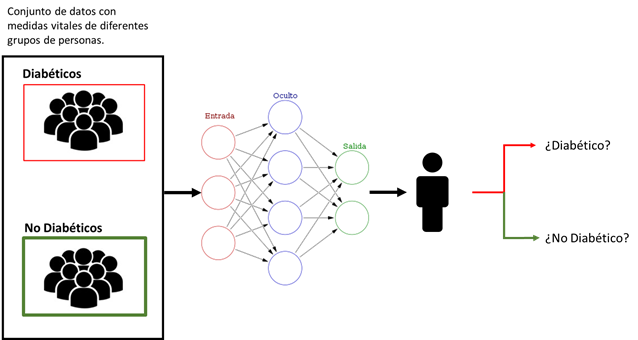

## Descripción del Dataset

 El conjunto de datos que utilizaremos para este proyecto proviene del conjunto de datos de Pima Indians Diabetes, proporcionado por el National Institute of Diabetes and Digestive and Kidney Diseases (alojado en [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)).


Los indios Pima son un grupo de nativos americanos que viven en Arizona, y son un grupo de personas muy estudiado debido a su predisposición genética a la diabetes. Se cree que los indios Pima son portadores de un gen que les permite sobrevivir a largos períodos de inanición. Este gen ahorrador permitía a los indios Pima almacenar en su cuerpo la glucosa y los hidratos de carbono que pudieran comer, lo que resultaba genéticamente ventajoso en un entorno en el que las hambrunas eran habituales.

Sin embargo, a medida que la sociedad se modernizó y los indios Pima empezaron a cambiar su dieta por una de alimentos procesados, la tasa de diabetes de tipo 2 entre ellos también empezó a aumentar. En la actualidad, la incidencia de la diabetes de tipo 2 entre los indios Pima es la más alta del mundo. Esto hace que sea un grupo de personas muy estudiado, ya que los investigadores intentan encontrar el vínculo genético de la diabetes entre los indios Pima.

El conjunto de datos de diabetes de los indios Pima consiste en mediciones de diagnóstico recogidas de una muestra de mujeres indias Pima, junto con una etiqueta que indica si el paciente desarrolló diabetes en los cinco años siguientes a la medición inicial.

## Analisis de Datos Exploratorio
En este punto se realiza una revisión del conjunto de datos para entender el tipo de datos con los que estamos trabajando. Importamos el conjunto de datos en pandas:

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Las variables de entrada que describen a cada paciente son numéricas y tienen variables de escalas. A continuación se enumeran los ocho atributos del set de datos:

1. Número de embarazos.
2. Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
3. Presión arterial diastólica (mm Hg).
4. Grosor del pliegue de la piel del tríceps (mm).
5. Insulina sérica de 2 horas (mu U/ml).
6. Índice de masa corporal.
7. Función del pedigrí de la diabetes.
8. Edad (años).
9. Clase, aparición de diabetes en un plazo de cinco años.

* **Observación**: Los atributos son todos numéricos esto hace que sea fácil de usar directamente las redes neuronales ya que éstas esperan entradas y salidas numéricas.

Empecemos por visualizar la distribución de las nueve variables del conjunto de datos. Para ello, podemos trazar un histograma:

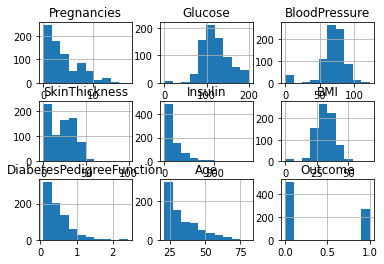

In [2]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

#### **Edad**
El histograma ofrece una visión interesante de los datos. En el histograma de la **edad**, podemos ver que la mayoría de los datos se recogieron de personas jóvenes, con el grupo de edad más común entre 20 y 30 años. 
#### **IBM - BloodPressure - Glucose**
También podemos ver que la distribución del IMC (IBM), la presión sanguínea (BloodPressure) y la concentración de glucosa (Glucose) tiene una distribución normal (es decir, una forma de campana), que es lo que esperamos cuando recogemos estas estadísticas de una población. 

Sin embargo, observe que la cola de la distribución de la concentración de glucosa muestra algunos valores bastante extremos. Parece que hay personas con una concentración de glucosa en plasma de casi 200. En el extremo opuesto de la distribución, podemos ver que hay personas con valores 0 para el IMC, la presión arterial y la glucosa.

Lógicamente, sabemos que no es posible tener un valor 0 para estas mediciones. ¿Son valores perdidos?.
#### **Embarazos**
Si observamos la distribución del número de embarazos anteriores, también podemos ver algunos valores atípicos. Podemos ver que algunas pacientes tuvieron más de 15 embarazos previos. Aunque esto no sea del todo sorprendente, debemos tener en cuenta estos valores atípicos cuando hagamos nuestro análisis, ya que pueden sesgar nuestros resultados.
#### **Resultado**
La distribución del resultado muestra que aproximadamente el 65% de la población pertenece a la clase 0 (sin diabetes), mientras que el 35% restante pertenece a la clase 1 (diabetes). 

#### **Mundo Real**
Al construir un clasificador de aprendizaje automático, siempre debemos tener en cuenta la distribución de las clases en nuestros datos de entrenamiento. 

Para garantizar que nuestro clasificador de aprendizaje automático funcione bien en el mundo real, debemos asegurarnos de que la distribución de las clases en nuestros datos de entrenamiento refleje la del mundo real. En este caso, la distribución de las clases no coincide con la del mundo real, ya que la Organización Mundial de la Salud (OMS) estima que sólo el 8,5% de la población mundial padece diabetes.


#### **Escalas**
Por último, es importante tener en cuenta que las variables están en diferentes escalas.

Por ejemplo, la variable **DiabetesPedigreeFunction** va de 0 a ~2,5, mientras que la variable **Insulin** va de 0 a ~800. 

Esta diferencia de escala puede causar problemas en el entrenamiento de nuestra red neuronal, ya que las variables con escalas más grandes tienden a dominar las variables con escalas más pequeñas. 
#### **Grafico de Correlación**
También es posible trazar un gráfico de densidad para investigar la relación entre cada variable y la variable objetivo. Para ello, utilizaremos seaborn. seaborn es una biblioteca de visualización de datos de Python basada en matplotlib.

El siguiente fragmento de código muestra cómo trazar un gráfico de densidad para cada variable. Para visualizar la diferencia en la distribución entre los diabéticos y los no diabéticos, también los trazaremos por separado en cada gráfico:



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

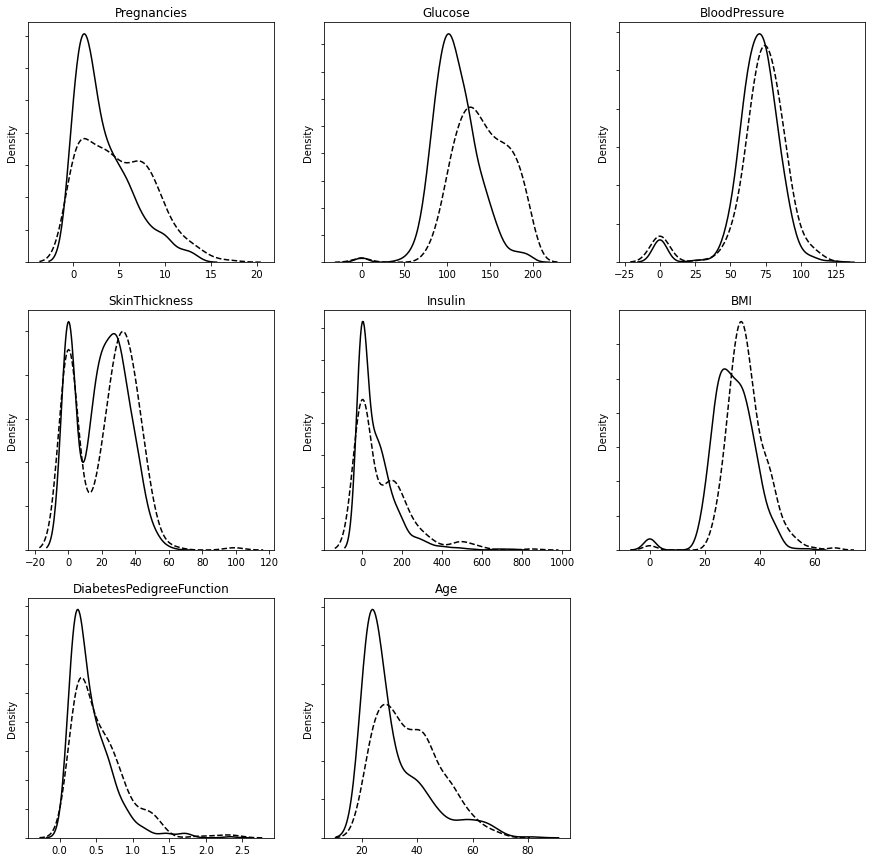

In [3]:
import seaborn as sns
# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))
# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
  ax = plt.subplot(3,3,idx+1)
  ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
  kde_kws={'linestyle':'-','color':'black', 'label':"No Diabetes"})
  sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False,
  kde_kws={'linestyle':'--','color':'black', 'label':"Diabetes"})
  ax.set_title(col)
# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.show()

#### **Análisis Graficos de Correlación - Densidad**
Los gráficos de densidad anteriores parecen complicados, pero centrémonos en cada uno de ellos y veamos qué información podemos obtener.

#### **Glucosa - Glucose**

Si observamos el gráfico de la variable glucosa, podemos ver que entre los **no diabéticos** (línea continua), la curva tiene una distribución normal centrada en el valor 100. Esto nos dice que entre los no diabéticos, la mayoría de las personas tienen un valor de glucosa en sangre de 100 mg/dl.

En cambio, si nos fijamos en **los diabéticos** (línea discontinua), la curva es más amplia y se centra en torno a un valor de 150. Esto nos indica que los diabéticos tienden a tener un rango más amplio de valor de glucosa en sangre, y el valor medio de glucosa en sangre está en torno a 150 mg/dL.

Por lo tanto, existe una diferencia significativa en los valores de glucosa en sangre de los diabéticos frente a los no diabéticos. 

#### **BMI - Age**
También se puede realizar un análisis similar para la variable IMC y la edad. En otras palabras, las variables Glucosa, IMC y Edad son fuertes predictores de la diabetes. Las personas con diabetes tienden a tener un mayor nivel de glucosa en sangre, un mayor IMC y una mayor edad.

#### **BloodPressure - SkinThickness**
Por otra parte, podemos ver que para variables como la presión sanguínea y el grosor de la piel, no hay diferencias significativas en la distribución entre diabéticos y no diabéticos. Los dos grupos de personas tienden a tener valores similares de presión arterial y grosor de la piel. Por lo tanto, **BloodPressure** y **SkinThickness** son peores predictores de la diabetes.


#Parte 3: Preprocesado de los datos

Previamente hemos descubierto que hay valores 0 en algunas columnas, lo que indica que faltan valores. También hemos visto que las variables tienen escalas diferentes, lo que puede afectar negativamente al rendimiento del modelo. A continuación, realizaremos un preprocesamiento de los datos para solucionar estos problemas.

En primer lugar, vamos a llamar a la función isnull() para comprobar si hay valores perdidos en el conjunto de datos:

In [4]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


Parece que no hay valores perdidos en el conjunto de datos, pero ¿estamos seguros? Obtengamos un resumen estadístico del conjunto de datos para seguir investigando:

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos ver que hay 768 filas de datos, y las columnas Embarazos, Glucosa, Presión arterial, Grosor de la piel, Insulina e IMC tienen un valor mínimo de 0. Esto no tiene mucho sentido. 

**Las medidas de Glucosa, Presión arterial, Espesor de la piel, Insulina e IMC nunca deberían ser 0.**

Esto indica que hay valores que faltan en nuestro conjunto de datos. Probablemente los valores se registraron como 0 debido a ciertos problemas durante la recogida de datos. Tal vez el equipo estaba defectuoso o el paciente no estaba dispuesto a que se le hicieran las mediciones.

Veamos cuántos valores 0 hay en cada columna para comprender la magnitud del problema:


In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


En la columna de la insulina, hay 374 filas con 0 valores. Eso es casi la mitad de los datos que tenemos. Está claro que no podemos descartar estas filas con valores 0, ya que eso provocaría una caída significativa en el rendimiento del modelo.

**Existen varias técnicas para tratar estos valores perdidos**:
* Eliminar (descartar) las filas con valores perdidos.
* Sustituir los valores que faltan por la media/mediana/modo de los valores que no faltan.
* Predecir los valores reales utilizando un modelo de aprendizaje automático independiente.

#### **Preprocesamiento**

Dado que los valores que faltan proceden de variables continuas como la glucosa, la presión sanguínea, el grosor de la piel, la insulina y el IMC, sustituiremos los valores que faltan por la media de los valores que no faltan.

#### **A1**
En primer lugar, vamos a sustituir los valores 0 de las columnas Glucosa, Presión arterial, Grosor de la piel, Insulina e IMC por NaN. De esta manera, pandas entenderá que estos valores no son válidos:

In [7]:
import numpy as np
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

#### **A2**
Ahora confirmemos que las columnas Glucosa, Presión arterial, Grosor de la piel, Insulina y
IMC ya no contienen valores 0:

In [8]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


#### **A3**
Tenga en cuenta que no hemos modificado la columna Embarazos, ya que los valores 0 en esa columna (es decir, 0 embarazos anteriores) son perfectamente válidos.
Ahora, vamos a sustituir los valores NaN por la media de los valores no ausentes. Podemos hacerlo utilizando la práctica función fillna() de pandas:

In [9]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

#### **Normalización de los Datos**

La normalización de datos es otra técnica importante en el preprocesamiento de datos. El objetivo de la estandarización de datos es transformar las variables numéricas para que cada una de ellas tenga una media cero y una varianza unitaria.

La normalización de las variables como paso previo al procesamiento es un requisito para muchos algoritmos de aprendizaje automático. En las redes neuronales, es importante normalizar los datos para garantizar que el algoritmo de retropropagación funcione como es debido. Otro efecto positivo de la normalización de los datos es que reduce la magnitud de las variables, transformándolas en una escala más proporcional.

Como hemos visto anteriormente, variables como Insulina y FunciónDiabetes tienen escalas muy diferentes; el valor máximo de Insulina es 846 mientras que el valor máximo de FunciónDiabetes es sólo 2,42. 

Con escalas tan diferentes, la variable con la escala más grande tiende a dominar cuando se entrena la red neuronal, haciendo que la red neuronal ponga inadvertidamente más énfasis en la variable con una escala mayor.

Para estandarizar nuestros datos, podemos utilizar la clase de preprocesamiento de scikitlearn. Vamos a importar la clase de preprocesamiento de scikit-learn y utilizarla para escalar nuestros datos:


In [10]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

Dado que el objeto devuelto por la función preprocessing.scale() ya no es un pandas DataFrame, vamos a convertirlo de nuevo:

In [11]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

Por último, como no queremos escalar la columna Outcome (que es la variable objetivo que estamos tratando de predecir) vamos a utilizar la columna Outcome original:

In [12]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

Veamos la media, la desviación estándar y el máximo de cada una de las variables transformadas:

In [13]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


Podemos ver que la escala de cada variable está ahora mucho más cerca una de otra.

#### **Dividir los datos en conjuntos de entrenamiento, prueba y validación**

El último paso del preprocesamiento de datos es dividirlos en conjuntos de entrenamiento, prueba y validación:

* **Conjunto de entrenamiento**: La red neuronal se entrenará con este subconjunto de datos.
* **Conjunto de validación**: Este conjunto de datos nos permite realizar ajuste de hiperparámetros (es decir, ajustar el número de capas ocultas) utilizando una fuente de datos no sesgada.
* **Conjunto de pruebas**: La evaluación final de la red neuronal se basará en este subconjunto de datos.

El objetivo de dividir los datos en conjuntos de entrenamiento, prueba y validación es evitar el sobreajuste y proporcionar una fuente de datos imparcial para evaluar el rendimiento del modelo.

Como regla general, deberíamos dividir los datos originales en un 80% de entrenamiento y un 20% de prueba, y luego volver a dividir los datos de entrenamiento en un 80% de entrenamiento y un 20% de validación. 
El siguiente diagrama ilustra este proceso:


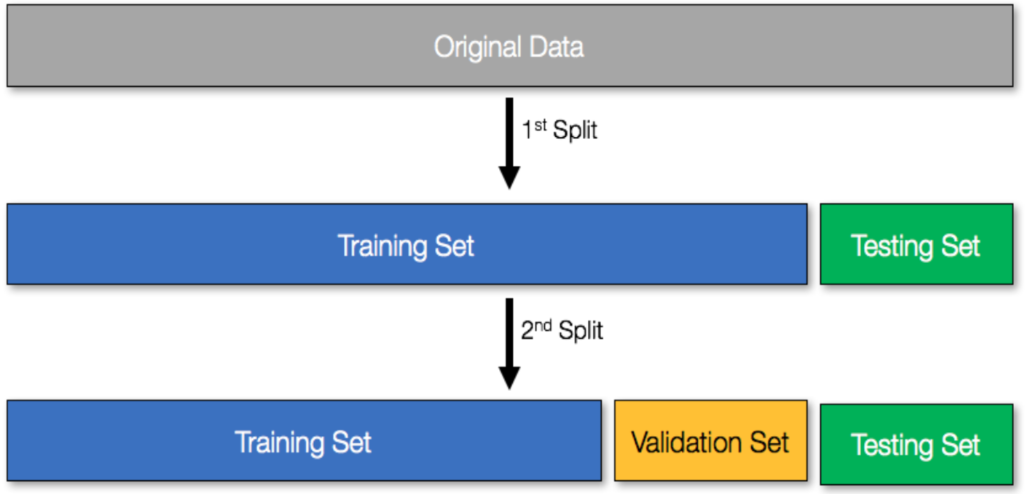


Un punto importante a tener en cuenta es que la división de los datos debe hacerse al azar. Si utilizamos un método no aleatorio para dividir los datos datos (por ejemplo, el primer 80% de las filas van al conjunto de entrenamiento y el el último 20% de las filas van al conjunto de pruebas), podríamos estar introduciendo introducir un sesgo en nuestro conjunto de entrenamiento y prueba. 

In [14]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#Parte 4: Arquitectura - MultiLayer Perceptron (MLP)

Esta arquitectura de red neuronal multicapa y la activación no lineal permiten que los MLP produzcan límites de decisión no lineales, lo cual es crucial en conjuntos de datos multidimensionales del mundo real, como el conjunto de datos de la diabetes de los indios Pima.

La arquitectura del modelo del MLP puede representarse gráficamente como sigue:
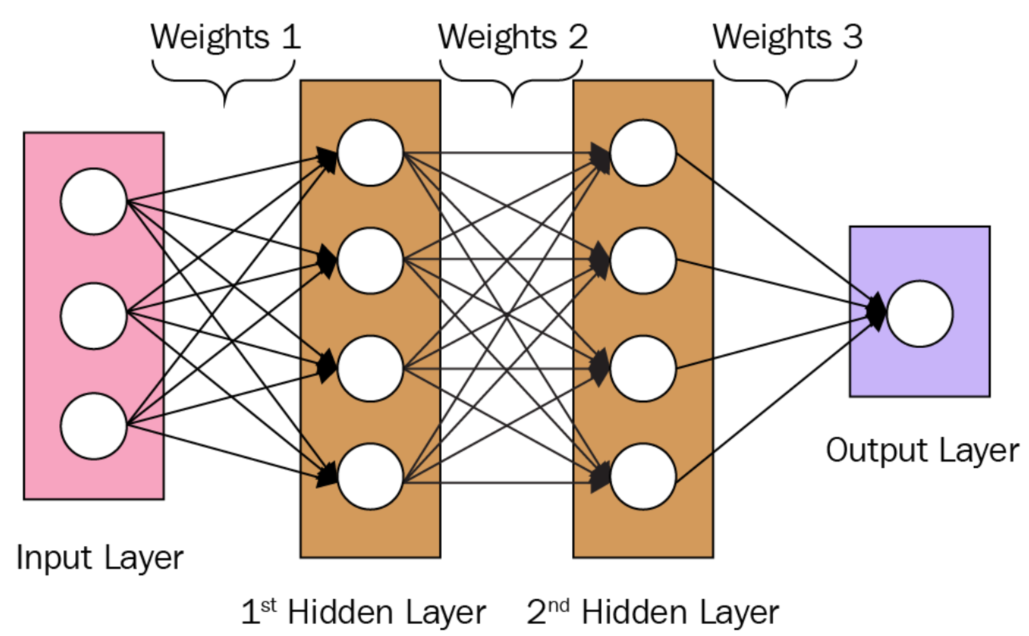


#### **¿Cómo saber el número de capas y sus tipos?**

Esta es una pregunta muy difícil. Hay estructuras de redes expertas que podemos utilizar y a menudo **la mejor estructura de red se encuentra a través de un proceso de experimentación de ensayo y error**. Por lo general, se necesita una red lo suficientemente grande para capturar la estructura del problema.

Para este proyecto, utilizaremos dos capas ocultas en nuestro MLP.

#### **Capa de Entrada**

Cada nodo de la capa de entrada se refiere a cada característica (es decir, columna) del conjunto de datos.

Como hay ocho características en el conjunto de datos de los indios Pima, debería haber ocho nodos en la capa de entrada de nuestro MLP.

#### **Capas Ocultas**

La capa oculta toma la capa de entrada y le aplica una función de activación no lineal. Matemáticamente.

Utilizaremos dos capas ocultas en nuestro modelo para este proyecto. Aumentar el número de capas ocultas tiende a incrementar la complejidad del modelo y el tiempo de entrenamiento. Para este proyecto, dos capas ocultas serán suficientes, como veremos más adelante cuando veamos el rendimiento del modelo. 

#### **Funciones de Activación**
Al diseñar la arquitectura del modelo de red neuronal, también tenemos que decidir qué funciones de activación utilizar para cada capa.

En este proyecto, utilizaremos la unidad lineal rectificada **(ReLU)** y la sigmoidea como funciones de activación.

#### **Construcción del modelo utilizando Keras**

In [15]:
from keras.models import Sequential
model = Sequential()

A continuación, vamos a apilar nuestra primera capa oculta. La primera oculta tendrá 32 nodos, y las dimensiones de entrada serán 8 (porque hay 8 columnas en X_train). 
Fíjate que para la primera capa oculta tenemos que indicar las dimensiones de entrada. Posteriormente, Keras se encargará de compatibilizar el tamaño de las demás capas ocultas de forma automática

In [16]:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(300, activation='relu', input_dim=8))
#Add the second hidden layer
model.add(Dense(100, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

#Parte 5: Compilación del Modelo

Antes de empezar a entrenar nuestro modelo, necesitamos definir los parámetros del proceso de entrenamiento, lo que se hace a través del método de compilación.

Hay tres parámetros diferentes que necesitamos definir para el
proceso de entrenamiento:

* **Optimizador**: Vamos a utilizar el optimizador adam, que es un optimizador popular en Keras. Para la mayoría de los conjuntos de datos, el optimizador adam funcionará bien sin mucho ajuste.

* **Función de pérdida**: Utilizaremos binary_crossentropy como nuestra función de pérdida ya que el problema en cuestión es un problema de clasificación binaria.

* **Métrica**: Utilizaremos la exactitud (es decir, el porcentaje de muestras clasificadas correctamente) como nuestra métrica de evaluación.

In [17]:
# Compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

# Parte 6: Entrenamiento del Modelo

Para entrenar nuestro modelo MLP definido en los pasos anteriores, vamos a llamar a la función de ajuste. Vamos a entrenar nuestro modelo durante 200 iteraciones:

In [18]:
# Train the model for 200 epochs
#model.fit(X_train, y_train, epochs=200)
history= model.fit(X_train, y_train, epochs=100,validation_data=(X_val,y_val),verbose=True)

Epoch 1/100
16/16 [==============================] - 2s 54ms/step - loss: 0.7063 - accuracy: 0.4684 - val_loss: 0.6892 - val_accuracy: 0.5041
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6672 - accuracy: 0.6599 - val_loss: 0.6537 - val_accuracy: 0.7236
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6365 - accuracy: 0.7210 - val_loss: 0.6273 - val_accuracy: 0.7073
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6132 - accuracy: 0.7271 - val_loss: 0.6057 - val_accuracy: 0.7073
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5939 - accuracy: 0.7189 - val_loss: 0.5877 - val_accuracy: 0.7073
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5776 - accuracy: 0.7230 - val_loss: 0.5724 - val_accuracy: 0.6992
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.5638 - accuracy: 0.7312 - val_loss: 0.5594 - val_accuracy: 0.7073
Epoch 8/

Como podemos ver, la pérdida disminuye y la precisión aumenta en cada época, ya que el algoritmo de aprendizaje actualiza continuamente los pesos y los sesgos en el MLP de acuerdo con los datos de entrenamiento. 
Tenga en cuenta que la precisión mostrada se refiere a la precisión basada en los datos de entrenamiento.

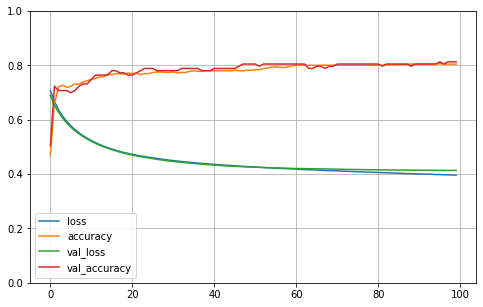

In [19]:
# se utiliza pandas para visualizar la información almacenada en el diccionario de historia de entrenamiento y graficarla. 
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Parte 7: Análisis de Resultados

Habiendo entrenado con éxito nuestro MLP, vamos a evaluar nuestro modelo basándonos en la precisión de las pruebas, la matriz de confusión y la curva ROC (receiver operating characteristic).

#### **Probando la Exactitud**

Podemos evaluar nuestro modelo en el conjunto de entrenamiento y en el conjunto de prueba utilizando la función evaluate():

In [20]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_val, y_val)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8045
Training Accuracy: 80.45%

5/5 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7273
Testing Accuracy: 72.73%

4/4 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8130
Testing Accuracy: 81.30%



La diferencia de precisión entre el conjunto de entrenamiento y el de pruebas no es sorprendente, ya que el modelo se entrenó en el conjunto de entrenamiento. De hecho, si se entrena el modelo en más iteraciones, podemos alcanzar el 100% de precisión en el conjunto de entrenamiento, pero eso no sería deseable, ya que sólo significa que estamos sobreajustando nuestro modelo. La precisión de las pruebas debe utilizarse siempre para evaluar el rendimiento de nuestro modelo en el mundo real, ya que el conjunto de pruebas representa datos del mundo real que el modelo nunca ha visto antes.

La precisión de la prueba del **73.38%** es interesante para el un modelo de dos capas ocultas. Esto significa que, dadas las ocho mediciones de un nuevo paciente (glucosa, presión arterial, insulina, etc.), nuestro MLP es capaz de predecir con una precisión de ~75% si ese paciente desarrollará diabetes en los próximos cinco años.
En esencia, ¡hemos desarrollado nuestro primer agente de IA!





#### **Matrix De Confusión**
La matriz de confusión es una herramienta de visualización que proporciona un análisis sobre los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos realizados por nuestro modelo. 
Más allá de una simple métrica de precisión, también debemos observar la matriz de confusión para comprender el rendimiento del modelo.

* **Verdadero negativo**: La clase real es negativa (no hay diabetes), y el modelo predijo negativo (no hay diabetes)
* **Falso positivo**: La clase real es negativa (no hay diabetes), pero el modelo predijo positivo (diabetes)
* **Falso negativo**: La clase real es positiva (diabetes), pero el modelo predijo que sería negativa (sin diabetes)
* **Verdadero positivo**: La clase real es positiva (diabetes), y el modelo predijo algo positivo (diabetes)

Está claro que queremos que nuestros números de falsos positivos y falsos negativos sean lo más bajos posible, y que los números de verdaderos negativos y verdaderos positivos sean lo más altos posible.


Text(33.0, 0.5, 'Actual')

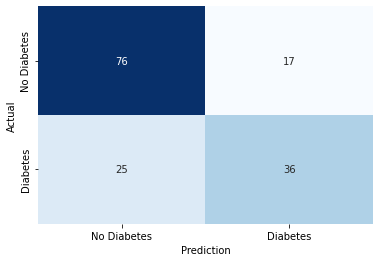

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = (model.predict(X_test) > 0.5).astype("int64")
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'],cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


A partir de la matriz de confusión , podemos ver que la mayoría de las predicciones son verdaderos negativos y verdaderos positivos. Las 17 predicciones restantes son falsos negativos y otras 22 predicciones son falsos positivos, lo que no es deseable.

Para la predicción de la diabetes, un falso negativo es quizás más perjudicial que un falso positivo. Un falso negativo significa decirle al paciente que no desarrollará diabetes en los próximos cinco años, cuando en realidad sí lo haría. Por lo tanto, cuando evaluamos el rendimiento de diferentes modelos para predecir la aparición de la diabetes, un modelo con un falso negativo más bajo es más deseable.

#### **Curva [ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419)**
Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

* Tasa de verdaderos positivos
* Tasa de falsos positivos

Cuando se analiza la curva ROC, nos fijamos en el área bajo la curva (AUC) para evaluar el rendimiento del modelo que produjo la curva. Un AUC grande indica que el modelo es capaz de diferenciar las respectivas clases con gran precisión, mientras que un AUC bajo indica que el modelo hace predicciones pobres, a menudo erróneas. 

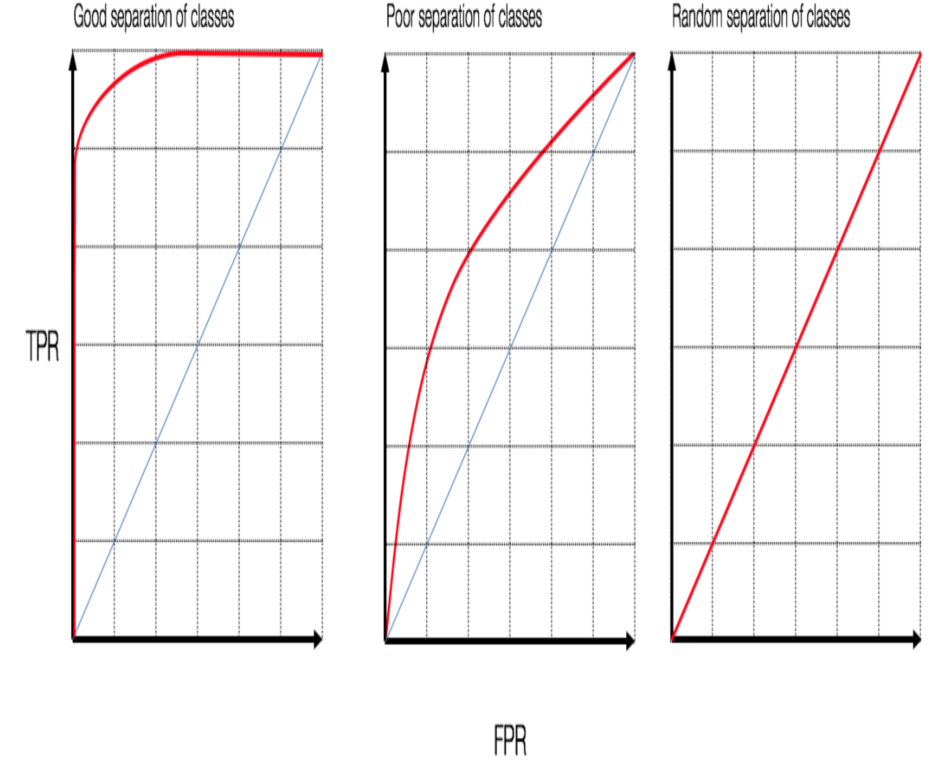

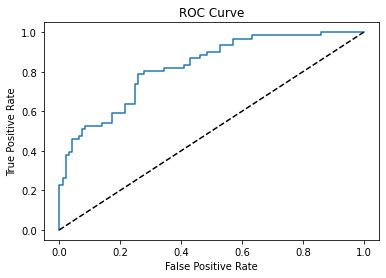

<Figure size 432x288 with 0 Axes>

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

A partir de la curva ROC anterior, podemos ver que el modelo funciona bastante bien, cerca de la curva ROC del modelo que se muestra en el diagrama anterior. Esto demuestra que nuestro modelo es capaz de diferenciar muestras de diferentes clases, haciendo buenas predicciones.